<a href="https://colab.research.google.com/github/Dr-Ning-An/FEM_Course/blob/main/FEM_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

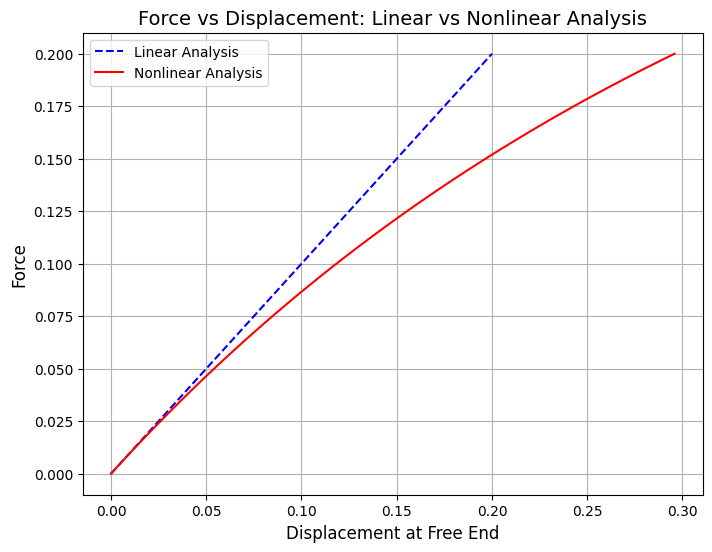

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Given parameters
L_0 = 1.0  # initial length
A_0 = 1.0  # initial cross-sectional area
E = 1.0  # Young's modulus
F = np.linspace(0, 0.2, 100)  # applied force from 0 to 0.2

# Define the implicit nonlinear equation to solve for u(L)
def nonlinear_eqn(u, F, L_0, A_0, E):
    return (F * (L_0 + u)) / (A_0 * L_0 * E) - np.log((L_0 + u) / L_0)

# Compute the displacement u(L) using fsolve for each F
u_nonlinear = np.zeros_like(F)
for i, f in enumerate(F):
    u_guess = 0.0  # Initial guess for displacement
    u_nonlinear[i] = fsolve(nonlinear_eqn, u_guess, args=(f, L_0, A_0, E))[0]

# Linear displacement (u = F * L / (E * A))
u_linear = (F * L_0) / (E * A_0)

# Plotting Force vs Displacement
plt.figure(figsize=(8, 6))
plt.plot(u_linear, F, label="Linear Analysis", color="blue", linestyle='--')  # Force-displacement for linear
plt.plot(u_nonlinear, F, label="Nonlinear Analysis", color="red", linestyle='-')  # Force-displacement for nonlinear

plt.ylabel('Force', fontsize=12)
plt.xlabel('Displacement at Free End', fontsize=12)
plt.title('Force vs Displacement: Linear vs Nonlinear Analysis', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
